In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')
%matplotlib inline

# Квантили

In [ ]:
norm_rv = stats.norm(loc=0, scale=1)  # задаём генератор
alpha = 0.05
norm_rv.ppf(1 - alpha/2) # находим квантиль

1.959963984540054

__Асимптотический доверительный интервал:__

$$
\bar x \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\sigma^2}{n}}.
$$

(-1.959963984540054, 1.959963984540054)

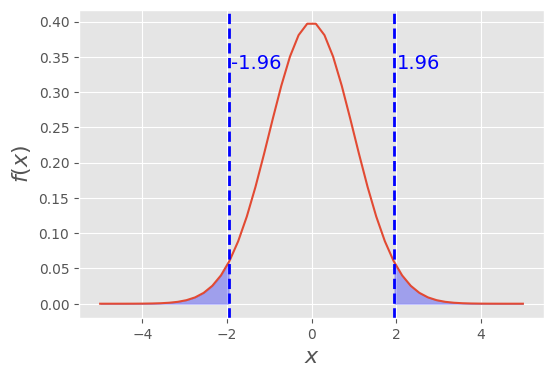

In [ ]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """

    plt.figure(figsize=(6,4))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=16)
    plt.xlabel('$x$', fontsize=16)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

alpha = 0.05
norm_conf_int(0.05)

## Задача. Мой друг - спортсмен
Мой друг вписался в challenge, где каждый день нужно делать отжимания. После первой недели он хочет оценить сколько в среднем отжиманий он делал и в каком доверительном интервале эта оценка находится.

In [ ]:
# отжиманий в день
x = [10, 12, 17, 23, 10, 27, 30]

In [ ]:
x_mean = np.mean(x)
x_mean

18.428571428571427

In [ ]:
# Посчитаем доверительный интервал для такой оценки

norm_rv = stats.norm(loc=0, scale=1)

# задаём уровень значимости
alpha = 0.05
# рассчитываем квантиль
z_alpha = norm_rv.ppf(1 - alpha/2)

# посчитаем стандартное отклонение

x_std = np.std(x, ddof=1)/np.sqrt(len(x))

# посчитаем границы доверительного интервала
x_left = x_mean - z_alpha*x_std
x_right = x_mean + z_alpha*x_std

print(f"Доверительный интервал: [{x_left:.3}, {x_right:.3}] ширины {x_right - x_left:.3}")

Доверительный интервал: [17.9, 19.0] ширины 1.15


In [ ]:
# Посчитаем доверительный интервал c помощью готовой функции
stats.norm.interval(0.95, loc=x_mean, scale=x_std)

(17.854213050687573, 19.00292980645528)

(17.854213050687573, 19.00292980645528)

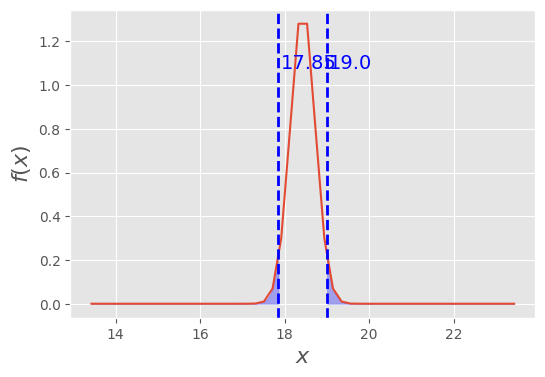

In [ ]:
# Воспользуемся нашей функцией для отрисовки доверительного интервала
norm_conf_int(alpha, mean_hat=x_mean, std_hat=x_std)

## Конкурент
У моего друга в challenge есть конкурент, который считает, что достиг наилучшего прогресса в отжимаях за неделю по сравнению со всеми. Нужно построить доверительный интервал для разности достижений ребят и понять, правда ли это.

In [ ]:
y = [7, 10, 15, 20, 23, 29, 35]

In [ ]:
diff = np.mean(x) - np.mean(y)
diff_se = np.sqrt(np.mean(x)/len(x) + np.mean(y)/len(y))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se

print(f"Доверительный интервал: [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал: [-6.01, 3.16] ширины 9.17


# Распределение Хи-квадрат

Пусть случайные величины $X_1, \ldots, X_k$ независимы и одинаково нормально распределены с параметрами $0$ и $1$:

$$
X_1, \ldots, X_k \sim iid \hspace{2mm} N(0,1).
$$

$iid$ - identically independently distributed

Тогда случайная величина $Y = X_1^2 + \ldots X_k^2$ имеет распределение хи-квадрат с $k$ степенями свободы.     
$Y \sim \chi^2_k.$

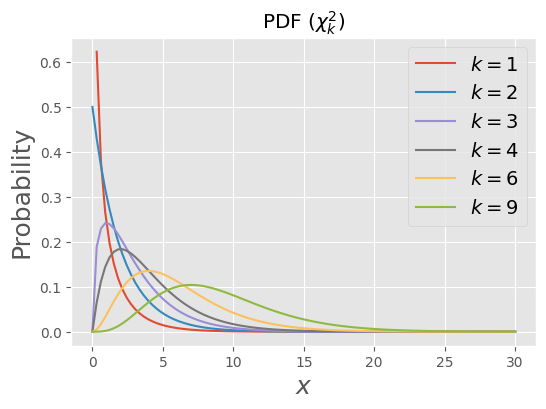

In [ ]:
plt.figure(figsize=(6, 4))

x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = stats.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

plt.xlabel('$x$', fontsize=18)
plt.ylabel(r'Probability', fontsize=18)
plt.legend(fontsize = 14)

# Распределение Стьюдента

Случайная величина $X_0$ имеет стандартное нормальное распределение. Пусть она независима от $X_1, \ldots, X_k$. Тогда, случайная величина

$$ Y = \frac{X_0}{\sqrt{\frac{\chi^2_k}{k}}} $$

имеет $t$-распределение стьюдента c $k-1$ степенью свободы, $Y \sim t (k-1)$.

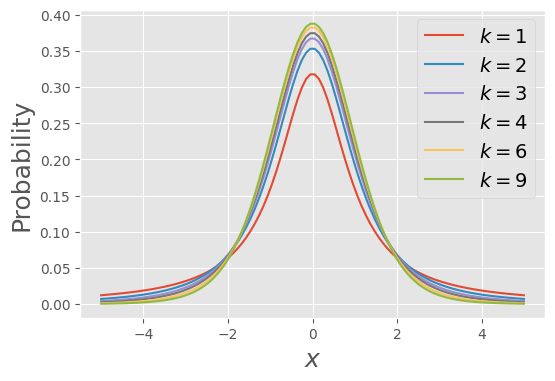

In [ ]:
plt.figure(figsize=(6, 4))

x = np.linspace(-5,5,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = stats.t(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)

plt.xlabel('$x$', fontsize=18)
plt.ylabel(r'Probability', fontsize=18)
plt.legend(fontsize = 14);

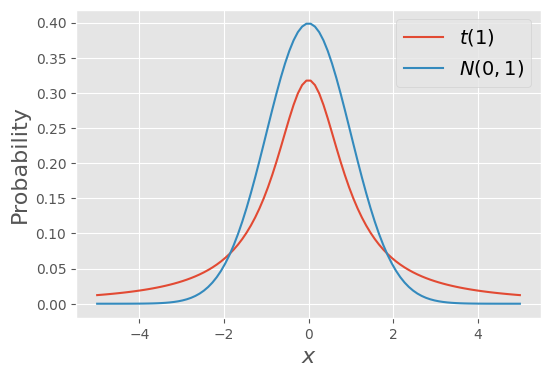

In [ ]:
plt.figure(figsize=(6, 4))
x = np.linspace(-5,5,100)

plt.plot(x, stats.t(1).pdf(x), label="$t(1)$")
plt.plot(x, stats.norm(0, 1).pdf(x), label="$N(0,1)$")

plt.xlabel('$x$', fontsize=16)
plt.ylabel(r'Probability', fontsize=16)
plt.legend(fontsize = 14)

# Задача. Метрики продукта

__Точный доверительный интервал:__  
Выборка пришла из нормального распределения, дисперсия неизвестна.

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat\sigma^2}{n}}.
$$


In [ ]:
!curl -O https://raw.githubusercontent.com/alina-zhu/datasets/refs/heads/master/website_visits_conversions_2023.csv >> website_visits_conversions_2023.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9001  100  9001    0     0  79352      0 --:--:-- --:--:-- --:--:-- 79654


In [ ]:
df = pd.read_csv('website_visits_conversions_2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            365 non-null    object 
 1   registrations   365 non-null    int64  
 2   total_visitors  365 non-null    int64  
 3   visitor_2_lead  365 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 11.5+ KB


In [ ]:
df.head()

,date,registrations,total_visitors
0,2023-01-01,121,2548
1,2023-01-02,220,4646
2,2023-01-03,49,1216
3,2023-01-04,104,2323
4,2023-01-05,109,2581


<Axes: >

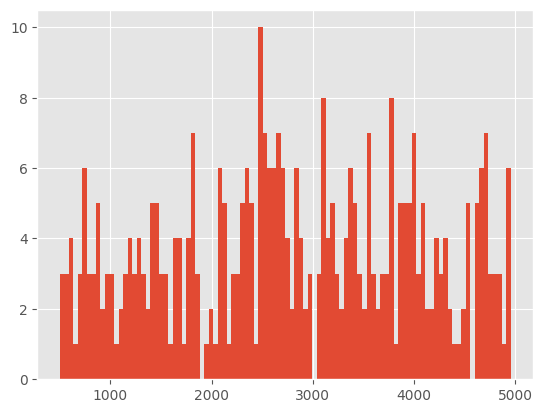

In [ ]:
df.total_visitors.hist(bins=100)

In [ ]:
n = df.total_visitors.count()
n

365

In [ ]:
t_rv = stats.t(n-1)
alpha = 0.05
t_crit = t_rv.ppf(1-alpha/2)

mu = df.total_visitors.mean()
var = df.total_visitors.var(ddof=1)

left = mu - t_crit * np.sqrt(var/n)
right = mu + t_crit * np.sqrt(var/n)

print(f"Доверительнй интервал: {int(left)}, {int(right)}, {right - left}")

Доверительнй интервал: 2661, 2914, 253.634589258907


In [ ]:
sd = df.total_visitors.std(ddof=1)/np.sqrt(n)
left, right = stats.t.interval(0.95, df=(n-1), loc=mu, scale=sd)
print(f"Доверительнй интервал: {int(left)}, {int(right)}, {right - left}")

Доверительнй интервал: 2661, 2914, 253.634589258907


In [ ]:
sd = df.total_visitors.std(ddof=1)/np.sqrt(n)
left, right = stats.norm.interval(0.95, loc=mu, scale=sd)
print(f"Доверительнй интервал: {int(left)}, {int(right)}, {right - left}")

Доверительнй интервал: 2661, 2914, 252.79125899367955


__Доверительный интервал для доли:__  



$$
N = p±z_{1-\frac{\alpha}{2}}\sqrt{\frac{p(1-p)}{n}}
$$


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['visitor_2_lead'] = df['registrations'] / df['total_visitors']

In [ ]:
df.head()

,date,registrations,total_visitors,visitor_2_lead
0,2023-01-01,121,2548,0.047488
1,2023-01-02,220,4646,0.047353
2,2023-01-03,49,1216,0.040296
3,2023-01-04,104,2323,0.044770
4,2023-01-05,109,2581,0.042232


<Axes: xlabel='date'>

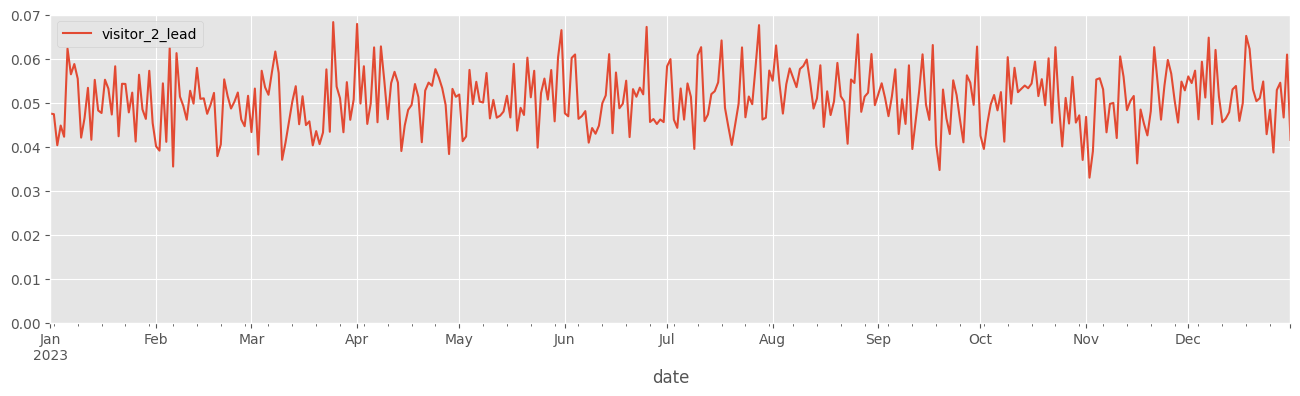

In [ ]:
df[['date', 'visitor_2_lead']].plot(x='date', ylim = (0, 0.07), figsize=(16,4))

In [ ]:
alpha = 0.05
q = stats.norm.ppf(1-alpha/2)
df['se'] = np.sqrt(df['visitor_2_lead']*(1 - df['visitor_2_lead'])/df['total_visitors'])

In [ ]:
df['left'] = df['visitor_2_lead'] - q*df['se']
df['right'] = df['visitor_2_lead'] + q*df['se']

In [ ]:
df.head()

,date,registrations,total_visitors,visitor_2_lead,se,left,right
0,2023-01-01,121,2548,0.047488,0.004213,0.039230,0.055746
1,2023-01-02,220,4646,0.047353,0.003116,0.041245,0.053460
2,2023-01-03,49,1216,0.040296,0.005639,0.029243,0.051349
3,2023-01-04,104,2323,0.044770,0.004291,0.036360,0.053179
4,2023-01-05,109,2581,0.042232,0.003959,0.034473,0.049991


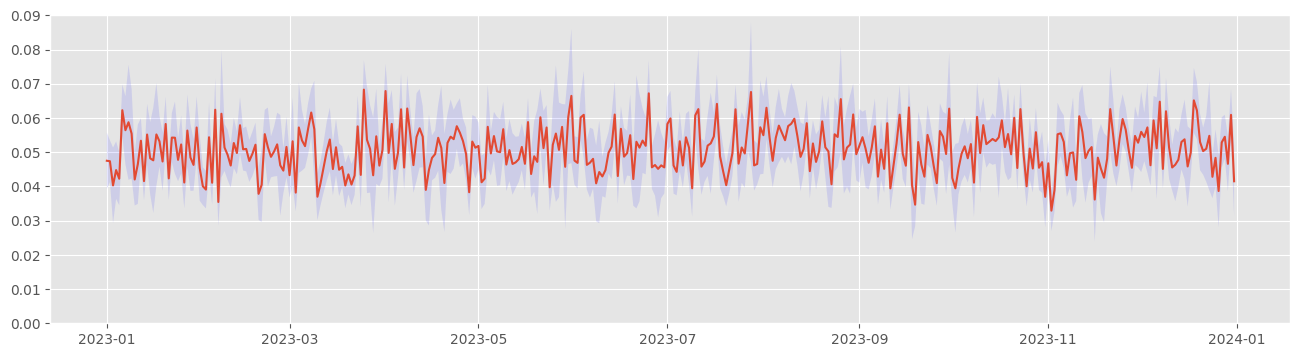

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
ax.set_ylim([0, 0.09])
ax.plot(df['date'] , df['visitor_2_lead'])
ax.fill_between(df['date'], df['left'], df['right'], alpha=0.1, facecolor='blue')